# Import packages

In [11]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
from statsmodels.stats.multitest import fdrcorrection
import patch_seq_spl.helper_functions as src
from importlib import reload
import json
import matplotlib.pyplot as plt
import seaborn as sns
from utility.ryp import r, to_r
import anndata

In [21]:
adata = anndata.read_h5ad("proc/scquint/preprocessed_adata_three.h5ad")
VGIC_LGIC = np.load("data/VGIC_LGIC.npy", allow_pickle=True)
adata = adata[:, adata.var.gene_name.isin(VGIC_LGIC)]

/Users/xunuo/miniforge3/envs/patch_seq_spl/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [23]:
glm_results = src.get_glm_results("proc/scquint/three/simple")
glm_results = src.rank_introns_by_n_sig_corr(glm_results, "all")

In [30]:
glm_results.loc[glm_results.index.str.split("_", expand=True).get_level_values(0).isin(VGIC_LGIC)].to_csv("proc/VGIC_hits.csv")

In [49]:
r(
"""
gtf_path <- paste0(Sys.getenv("GENOMIC_DATA_DIR"), "/Ensembl/Mouse/Release_110/Raw/Mus_musculus.GRCm39.110.gtf")
annotation_from_gtf <- rtracklayer::import(gtf_path) %>%
    dplyr::as_tibble() %>%
    dplyr::select(seqnames, start, end, strand, type, gene_name, transcript_name, transcript_biotype, tag)
"""
)

In [32]:
r(
"""
options(warn=-1)
source("scripts/transcript_viz.r")
"""
)

In [43]:
to_r(pd.DataFrame(adata.var), "sig_intron_attr")

null device 
          1 


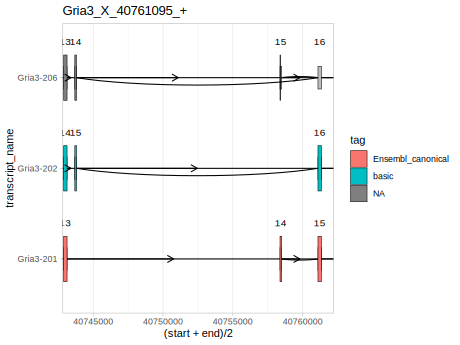

In [51]:
r(
"""
plot_intron_group("Gria3_X_40761095_+")
"""
)


In [48]:
adata[:, adata.var.intron_group == "Scn1a_2_66181571_-"].var

,chromosome,start,end,strand,intron_motif,annotation,unique,multi,max_overhang,i,canonical_start,gene_id_start,canonical_end,gene_id_end,n_genes,gene_id,gene_name,intron_group,n_genes_per_intron_group,intron_group_size
16668,2,66181571,66240205,-,2,1,18692,98,23,430661,1,ENSMUSG00000064329,1,ENSMUSG00000064329,1,ENSMUSG00000064329,Scn1a,Scn1a_2_66181571_-,1,4
16669,2,66181571,66241686,-,2,1,439,9,18,430662,1,ENSMUSG00000064329,2,,1,ENSMUSG00000064329,Scn1a,Scn1a_2_66181571_-,1,4
16670,2,66181571,66271043,-,2,1,9513,8,24,430664,1,ENSMUSG00000064329,0,ENSMUSG00000064329,1,ENSMUSG00000064329,Scn1a,Scn1a_2_66181571_-,1,4
16671,2,66181571,66271179,-,2,1,460,1,25,430665,1,ENSMUSG00000064329,2,,1,ENSMUSG00000064329,Scn1a,Scn1a_2_66181571_-,1,4


null device 
          1 


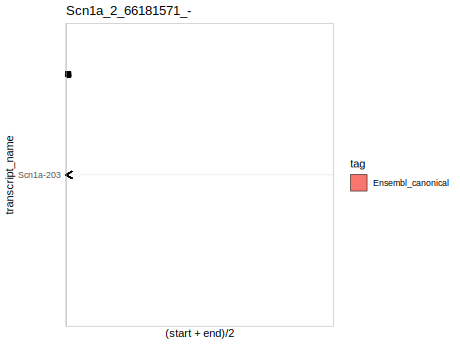

In [52]:
r(
"""
plot_intron_group("Scn1a_2_66181571_-")
"""
)